# Ecommerce Customer Churn Dataset Analytics
### By : Ivan Reinaldo

## Business Problem Understanding

**Context :**  

Dataset yang dipakai dimiliki oleh sebuah perusahaan E-commerce terdepan. Perusahaan tersebut ingin memprediksi apakah seorang customer akan churn (berhenti menggunakan layanan yang diberikan), sehingga mereka dapat mengantisipasi hal tersebut dengan memberikan promo yang sesuai kepada customer yang ada.

**Target :**

- 0 : Customer tidak churn
- 1 : Customer churn

**Problem Statement :**

Perusahaan E-commerce tentunya sangat bergantung pada customer yang melakukan transaksi atau menggunakan layanan yang ditawarkan. Seringkali perusahaan hanya berfokus pada mendapat customer baru, padahal berdasarkan penelitian didapati bahwa returning customer dapat membawa profit lebih banyak, dan biaya yang dibutuhkan untuk mendapat customer baru jauh lebih besar dibandingkan dengan biaya mempertahankan customer.

**Goals :**

Melihat permasalahan tersebut, perusahaan ingin memiliki kemampuan untuk memprediksi kemungkinan seorang customer akan churn atau tidak, sehingga perusahaan dapat mengantisipasi nya dengan memberikan insentif seperti promo, cashback, dan lainnya.

**Analytic Approach :**

Yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan customer yang akan churn atau tidak, dimana kemudian kita akan membangun model **klasifikasi** yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang customer akan churn atau tidak.

<br>**References :**
- https://blog.usetada.com/id/alasan-pentingnya-retention-marketing-untuk-kesuksesan-bisnis
- https://blog.smile.io/repeat-customers-profitable/
- https://www.forbes.com/sites/jiawertz/2018/09/12/dont-spend-5-times-more-attracting-new-customers-nurture-the-existing-ones/?sh=46fdebf25a8e
- https://sharpencx.com/blog/loyal-customers-vs-new-customers/
- https://www.outboundengine.com/blog/customer-retention-marketing-vs-customer-acquisition-marketing/#:~:text=Acquiring%20a%20new%20customer%20can,customer%20is%205%2D20%25.
- https://www.wificolony.com/single-post/2019/02/01/5-cara-mengurangi-tingkat-churning-pelanggan


**Metric Evaluation**

[Confusion Matrix](https://github.com/reinaldoivan/CapstoneModule3/blob/main/Images/Matrix.png)

*Type 1 error : False Positive*
<br>Konsekuensi: Sia-sianya biaya dari promo yang diberikan

*Type 2 error : False Negative*
<br>Konsekuensi: Kehilangan retained customer

Berdasarkan konsekuensinya, maka kita akan membuat model yang dapat meminimalisir 2 hal:
1. Jumlah promo yang diberikan kepada customer *(False Positive)* sehingga cost yang keluar lebih efisien.
2. Jumlah customer yang dianggap akan bertahan tetapi justru keluar *(False Negative)*, karena konsekuensi ini akan merugikan perusahaan.

Oleh karena itu, kita akan menggunakan f1-score sebagai measurement.

<br>**References :**
- https://medium.com/analytics-vidhya/accuracy-vs-f1-score-6258237beca2
- https://www.statology.org/f1-score-vs-accuracy/

## Data Understanding

Dataset source: https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

Note : 
- Dataset tidak seimbang
- Sebagian besar fitur bersifat numerikal

### Attribute Information

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| Tenure | Float | Tenure of customer in organization [months] |
| WarehouseToHome | Float | Distance in between warehouse to home of customer |
| NumberOfDeviceRegistered | Int | Total number of deceives is registered on particular customer |
| PreferedOrderCat | Object | Preferred order category of customer in last month |
| SatisfactionScore | Int | Satisfactory score of customer on service |
| MaritalStatus | Object | Marital status of customer |
| NumberOfAddress | Int | Total number of address added on particular customer |
| Complain | Int | Any complaint has been raised in last month |
| DaySinceLastOrder | Float | Day Since last order by customer [days] |
| CashbackAmount | Float | Average cashback in last month |
| Churn | Int | 0 – Customer not churn, 1 – Customer churn |

### Import Libraries

In [2]:
# Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
from IPython.core.display import HTML 
plt.style.use('seaborn')

# Feature Engineering
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesRegressor, RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Ignore Warning
import sys
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [5]:
# Load Dataset
df = pd.read_csv("data_ecommerce_customer_churn.csv")
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [99]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [101]:
df[['Tenure','WarehouseToHome','DaySinceLastOrder']].describe()

,Tenure,WarehouseToHome,DaySinceLastOrder
count,3747.000000,3772.000000,3728.000000
mean,10.081398,15.650583,4.531652
std,8.498864,8.452301,3.667648
min,0.000000,5.000000,0.000000
25%,2.000000,9.000000,2.000000
50%,9.000000,14.000000,3.000000
75%,16.000000,21.000000,7.000000
max,61.000000,127.000000,46.000000


In [29]:
df['Tenure'].unique()

array([15.,  7., 27., 20., 30.,  1., 11., 17.,  6., 16., 10., nan,  8.,
       19.,  0.,  3.,  5.,  9., 18., 12., 24.,  4., 61., 25., 13., 14.,
        2., 21., 29., 26., 23., 31., 22., 28., 51., 60., 50.])

In [32]:
df['DaySinceLastOrder'].unique()

array([ 7., nan,  8., 11.,  2.,  1.,  4.,  3.,  6.,  0., 14.,  9., 10.,
       12.,  5., 17., 30., 18., 16., 13., 15., 46., 31.])

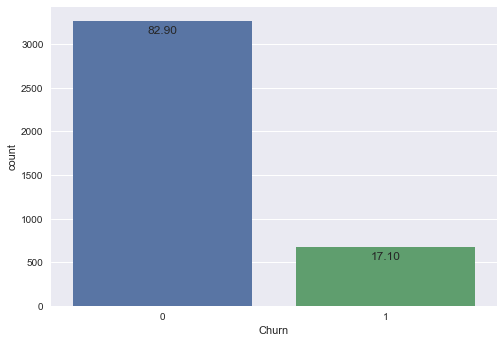

In [110]:
# Count the number of customers in the churn and not churn class
ax = sns.countplot(x='Churn', data=df)
for a in ax.patches:
    ax.annotate(format((a.get_height()/3941)*100,'.2f'), (a.get_x() + a.get_width()/2., a.get_height()),\
                ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
plt.show()

In [26]:
checkNull = df.dropna()
checkNull['Churn'].value_counts()

0    2855
1     510
Name: Churn, dtype: int64

## Data Cleaning

In [ ]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'values'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,values
0,Tenure,float64,194,4.92,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
1,WarehouseToHome,float64,169,4.29,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
2,NumberOfDeviceRegistered,int64,0,0.00,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,object,0,0.00,6,"[Laptop & Accessory, Mobile, Fashion, Others, ..."
4,SatisfactionScore,int64,0,0.00,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,object,0,0.00,3,"[Single, Married, Divorced]"
6,NumberOfAddress,int64,0,0.00,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,int64,0,0.00,2,"[0, 1]"
8,DaySinceLastOrder,float64,213,5.40,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,..."
9,CashbackAmount,float64,0,0.00,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."


Berdasarkan tampilan di atas, terdapat 3 kolom numerikal yang memiliki missing values, yaitu `Tenure`, `WarehouseToHome`, dan `DaySinceLastOrder`.

Jika kita langsung menghapus baris dengan data-data yang kosong, maka kita akan kehilangan sebanyak 576 baris, yaitu sekitar **15%** dari keseluruhan data. Untuk itu, lebih baik menggunakan **IterativeImputer/KNNImputer** untuk mengisi missing values tersebut.

Untuk menentukan metode terbaik, maka kita akan melakukan **cross validation**, hanya menggunakan data-data numerikal yang sudah tersedia (encoding data kategorikal akan dilakukan di proses preparation), dan kemudian dapat kita lihat dari rata-rata f1-score tertinggi.

<br> **Reference :**
- https://towardsdatascience.com/going-beyond-the-simpleimputer-for-missing-data-imputation-dd8ba168d505
- https://machinelearningmastery.com/iterative-imputation-for-missing-values-in-machine-learning/

In [70]:
# Feature/target arrays
X_full = df.drop(['Churn','PreferedOrderCat', 'MaritalStatus'], axis=1).copy()
y_full = df['Churn'].values.reshape(-1, 1)

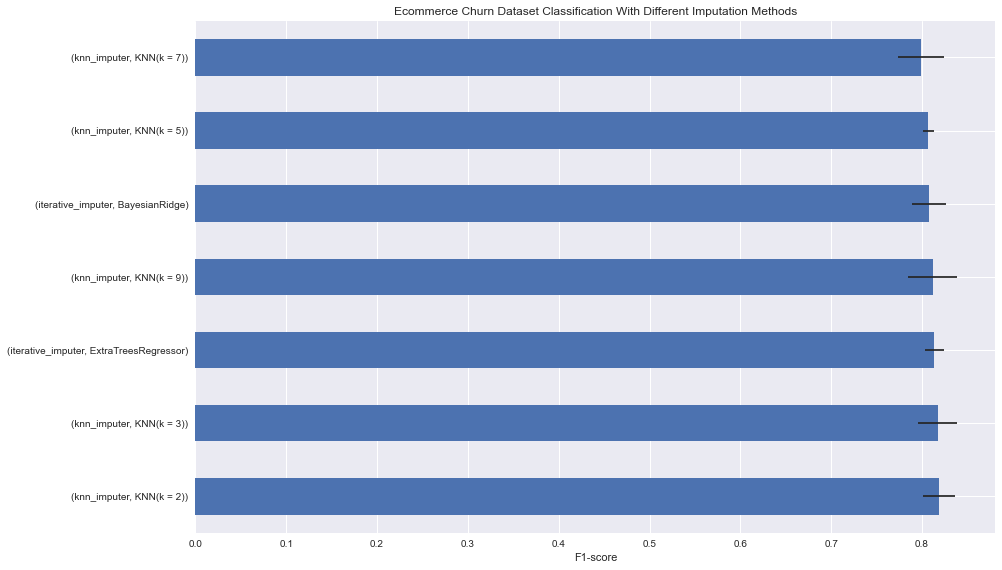

In [71]:
# Set global configs
cv = 5
scoring = "f1"
state = 10
forest = RandomForestClassifier()

# Store IterativeImputer scores
ii_scores = pd.DataFrame()
for estimator in [BayesianRidge(), ExtraTreesRegressor()]:
    pipe = make_pipeline(
        IterativeImputer(estimator=estimator, random_state=state), forest
    )
    ii_scores[estimator.__class__.__name__] = cross_val_score(
        pipe, X_full, y_full, scoring=scoring, cv=cv
    )

# Store KNN scores
knn_scores = pd.DataFrame()
n_neighbors = [2, 3, 5, 7, 9]
for k in n_neighbors:
    pipe = make_pipeline(KNNImputer(n_neighbors=k), forest)
    knn_scores[f"KNN(k = {k})"] = cross_val_score(
        pipe, X_full, y_full, scoring=scoring, cv=cv
    )

# Combines scores into a single DF
final_scores = pd.concat(
    [ii_scores, knn_scores],
    axis=1,
    keys=["iterative_imputer", "knn_imputer"],
)

# Plot
fig, ax = plt.subplots(figsize=(14, 8))

means, errors = final_scores.mean().sort_values(ascending=False), final_scores.std()
means.plot.barh(xerr=errors, ax=ax)

ax.set_title("Ecommerce Churn Dataset Classification With Different Imputation Methods")
ax.set_xlabel("F1-score")
ax.set_yticks(np.arange(means.shape[0]))

plt.tight_layout(pad=1)
plt.show();

In [92]:
means

knn_imputer        KNN(k = 2)             0.818643
                   KNN(k = 3)             0.817266
iterative_imputer  ExtraTreesRegressor    0.813726
knn_imputer        KNN(k = 9)             0.811638
iterative_imputer  BayesianRidge          0.807722
knn_imputer        KNN(k = 5)             0.807102
                   KNN(k = 7)             0.799053
dtype: float64

Berdasarkan grafik di atas, maka kita akan melakukan imputing dengan metode **KNNImputer 2 neighbors**.

In [6]:
# define imputer
imp_knn = KNNImputer(n_neighbors=2)

# pilih kolom
df[['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']] = imp_knn.fit_transform(df[['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']])

df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,4.5,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,16.5,4,Mobile,3,Married,10,1,0.0,124.37,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3941 non-null   float64
 1   WarehouseToHome           3941 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3941 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


Imputing telah dilakukan dan kita dapat melihat bahwa sudah tidak ada missing values.

Untuk kolom `Tenure` dan `DaySinceLastOrder`, kita juga perlu memastikan bahwa nilai hasil impute berbentuk bilangan bulat karena value dihitung dalam bulan dan hari.

In [8]:
df['Tenure'].unique()

array([15. ,  7. , 27. , 20. , 30. ,  1. , 11. , 17. ,  6. , 16. , 10. ,
        0. ,  8. , 19. ,  3. ,  5. ,  9. , 18. , 12. , 24. ,  4. ,  0.5,
       61. , 25. , 13. , 14. ,  2. , 21. , 29. , 26. , 23. , 31. ,  7.5,
       22. , 28. , 30.5, 13.5, 51. , 60. ,  8.5, 23.5,  9.5, 50. ])

In [9]:
df['Tenure'] = df['Tenure'].round()
df['Tenure'].unique()

array([15.,  7., 27., 20., 30.,  1., 11., 17.,  6., 16., 10.,  0.,  8.,
       19.,  3.,  5.,  9., 18., 12., 24.,  4., 61., 25., 13., 14.,  2.,
       21., 29., 26., 23., 31., 22., 28., 51., 60., 50.])

In [10]:
df['DaySinceLastOrder'].unique()

array([ 7. ,  4.5,  8. , 11. ,  2. ,  1. ,  4. ,  0.5,  3. ,  6. ,  0. ,
       14. ,  9. ,  1.5, 10. , 12. ,  3.5,  5. , 17. , 30. , 18. ,  8.5,
       16. ,  5.5,  2.5, 13. ,  7.5,  6.5, 15. , 46. , 31. ])

In [11]:
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].round()
df['DaySinceLastOrder'].unique()

array([ 7.,  4.,  8., 11.,  2.,  1.,  0.,  3.,  6., 14.,  9., 10., 12.,
        5., 17., 30., 18., 16., 13., 15., 46., 31.])

Setelah melakukan pembulatan kepada kedua kolom tersebut, maka data berhasil dibersihkan.

## Data Analysis

### Histogram & Boxplot

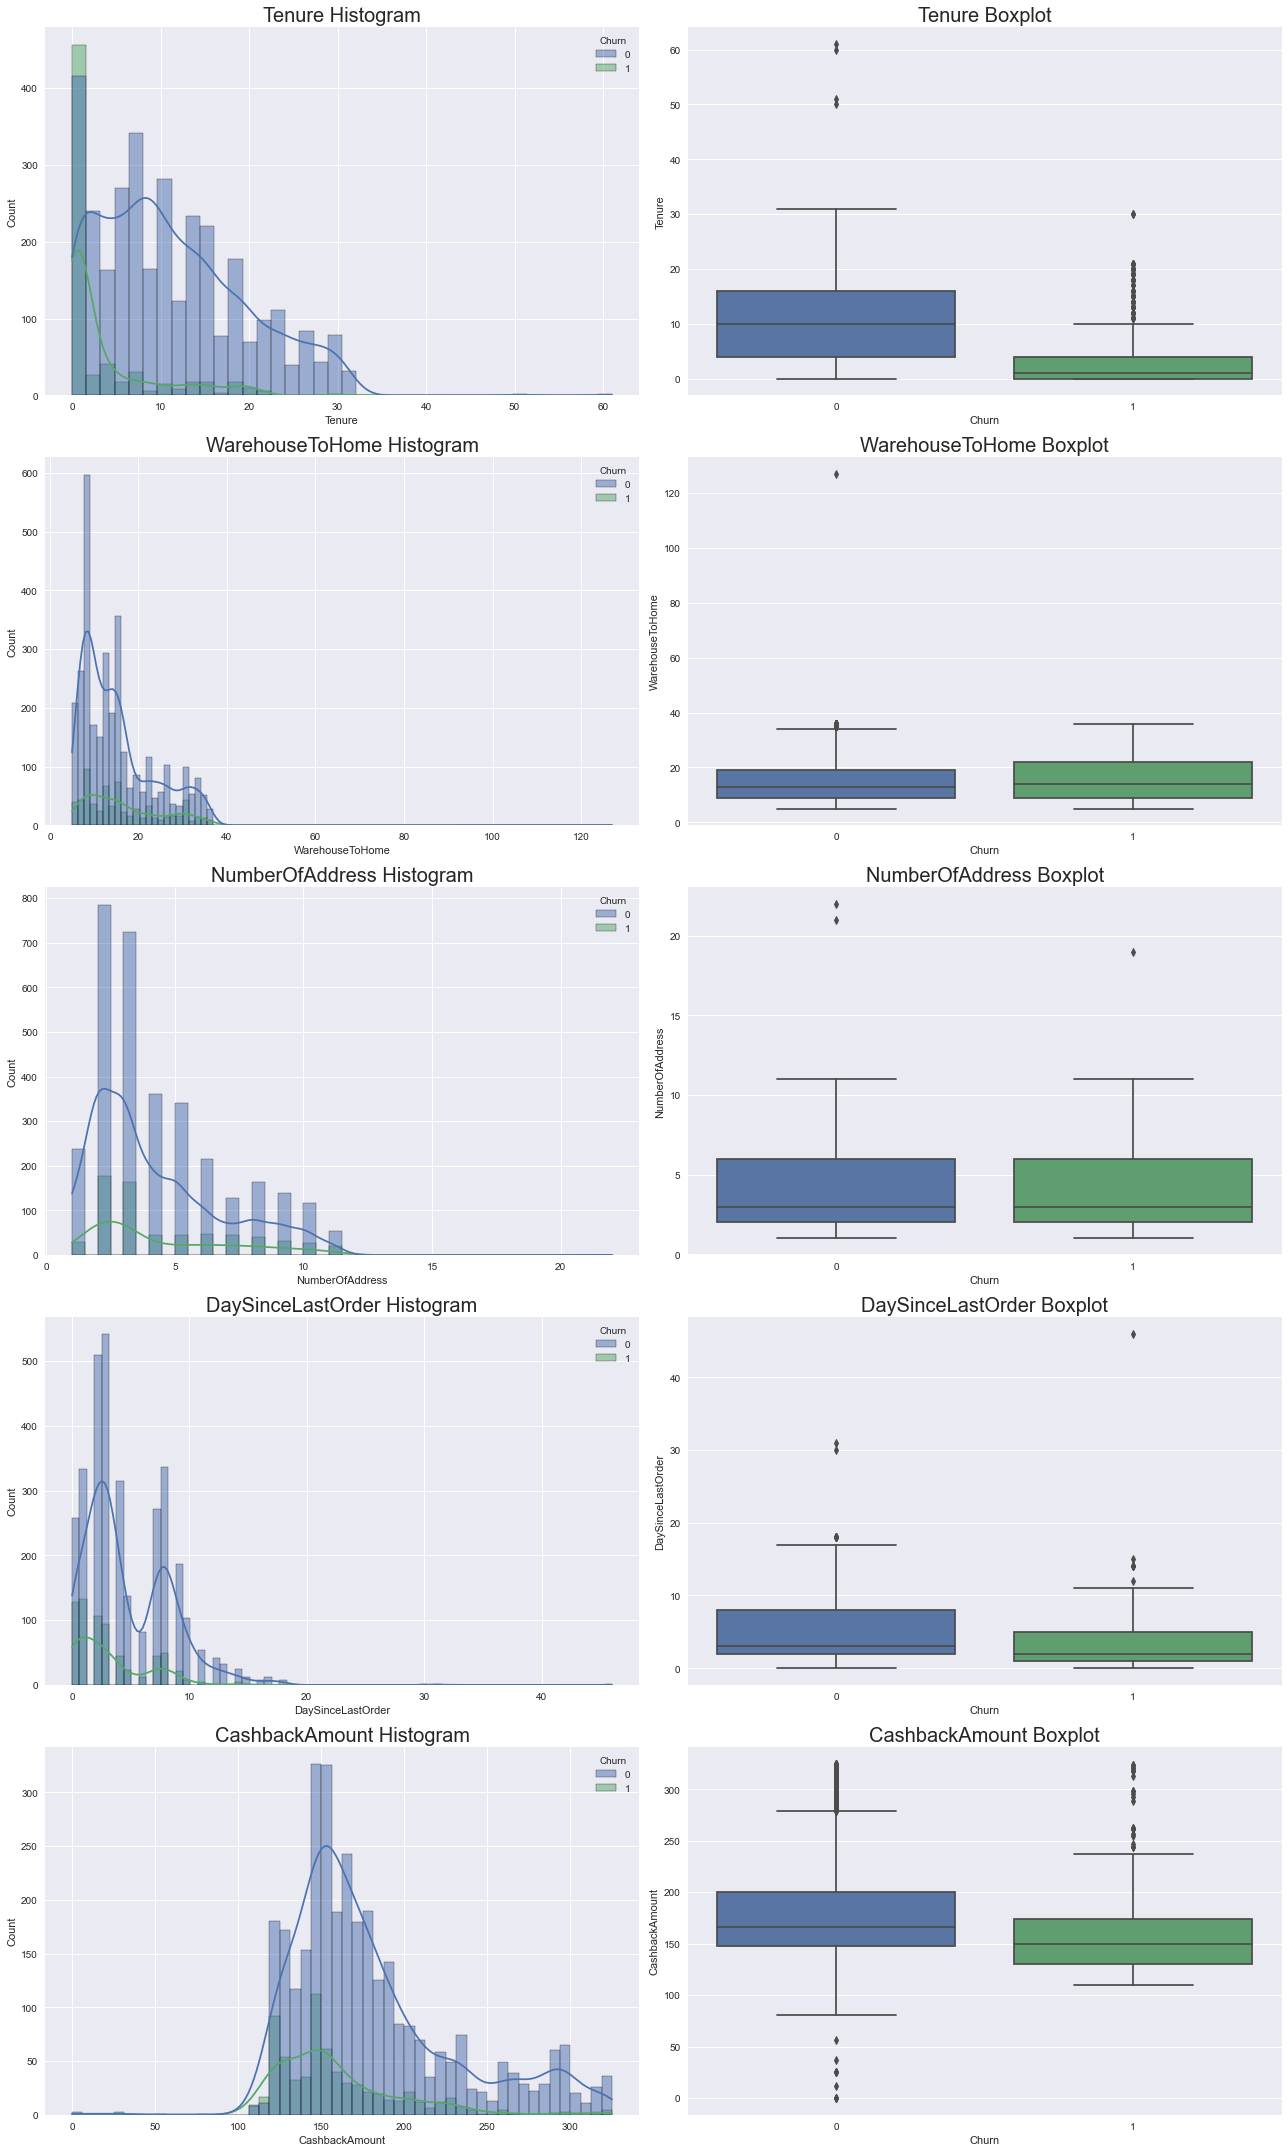

In [12]:
fig = plt.figure(figsize=(18,30))
count = 0

for i in df.drop(columns=['NumberOfDeviceRegistered','PreferedOrderCat','SatisfactionScore','MaritalStatus','Complain','Churn']).columns:
    count +=1
    ax= plt.subplot(5,2,count)
    sns.histplot(data=df,x=i,hue='Churn',kde=True)
    plt.title(f'{i} Histogram',fontsize=20)

    count +=1
    ax= plt.subplot(5,2,count)
    sns.boxplot(data=df,y=i, x='Churn')
    plt.title(f'{i} Boxplot',fontsize=20)
    fig.tight_layout()

plt.show()

### Countplot

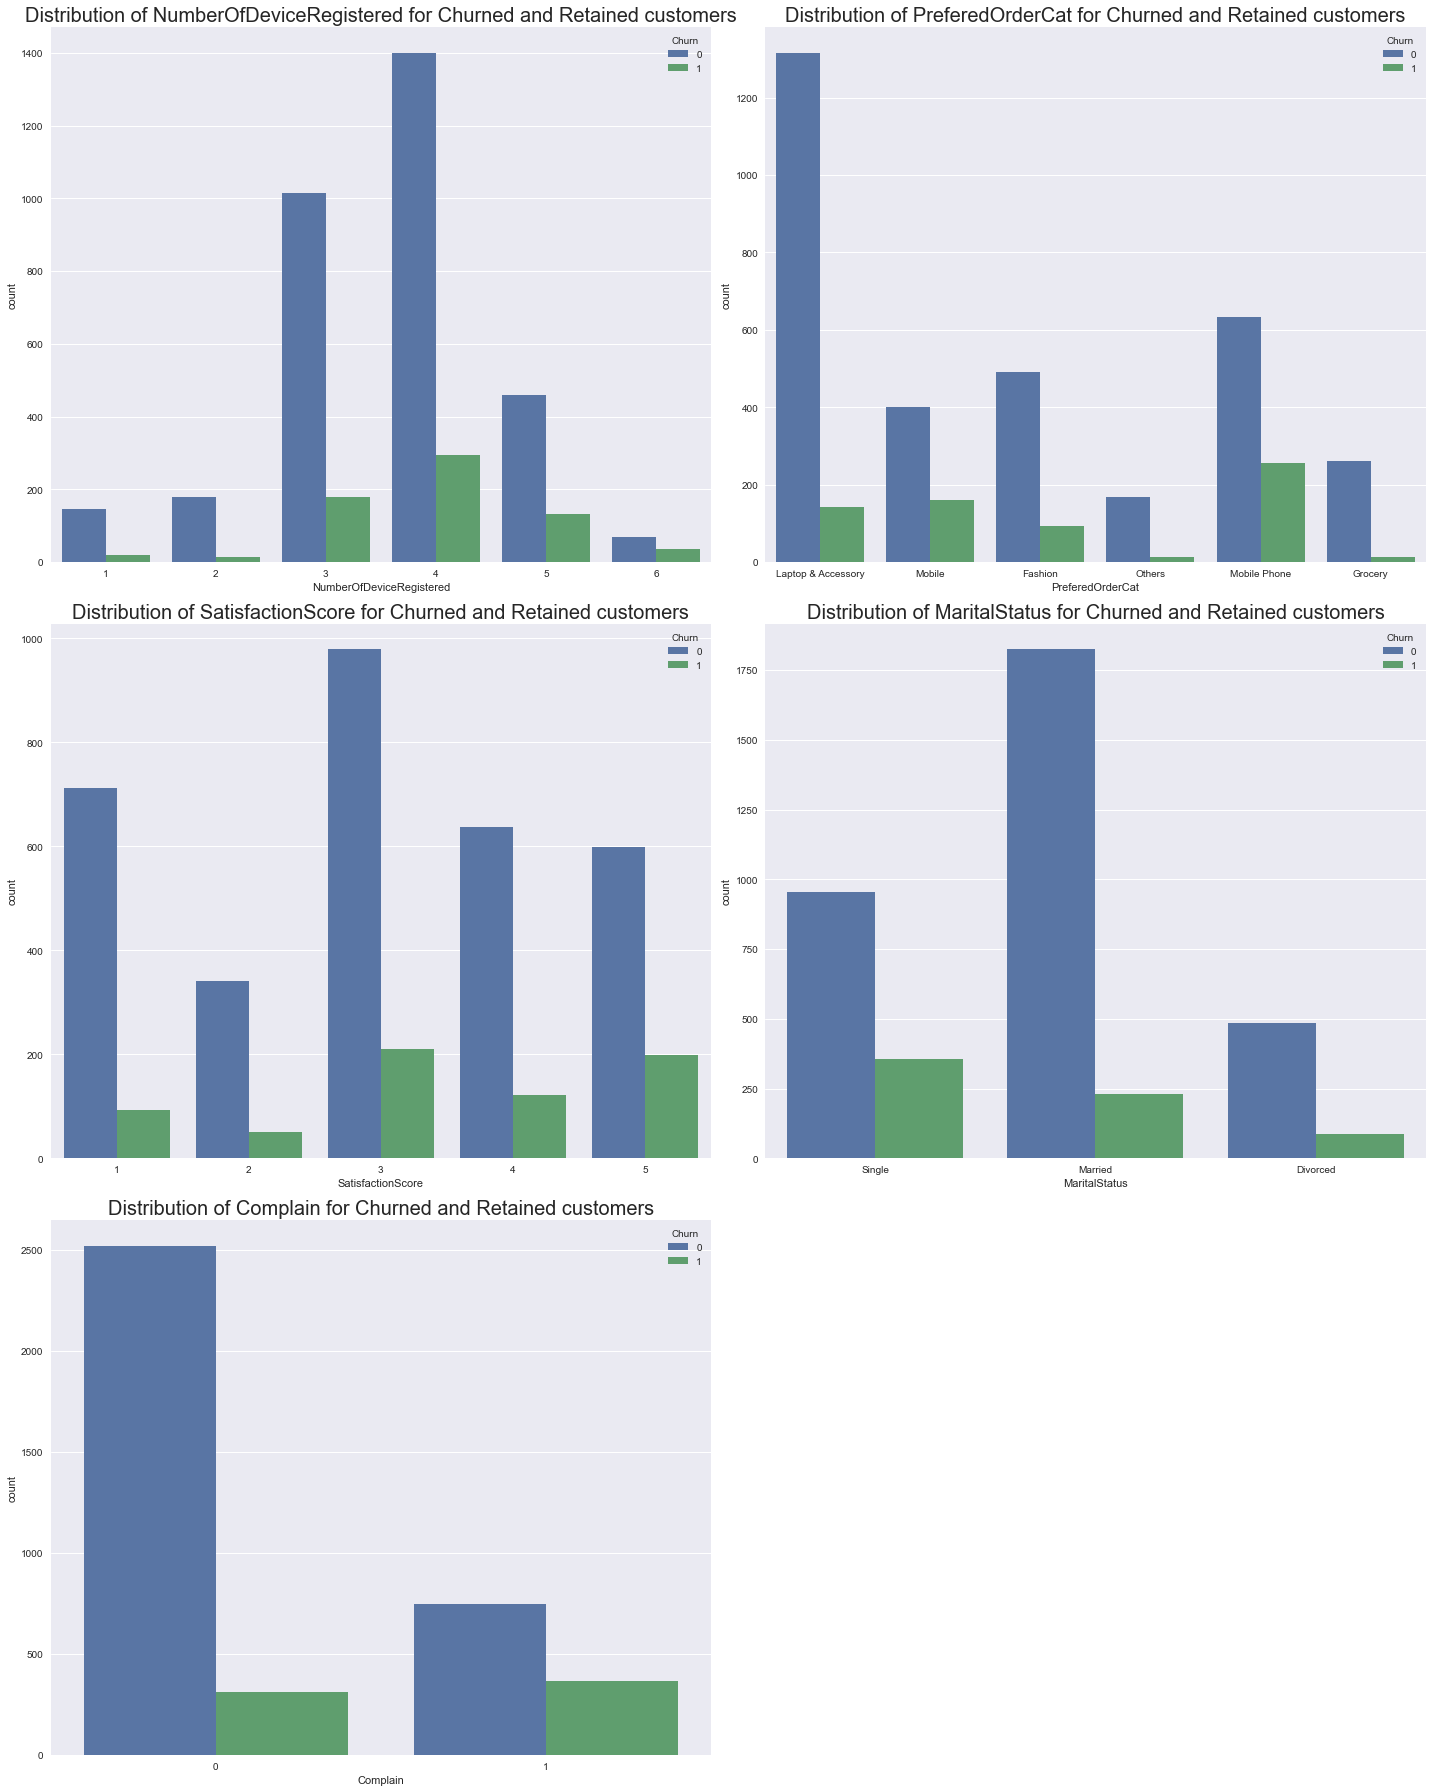

In [13]:
fig = plt.figure(figsize=(20,25))
count = 0

for i in df.drop(columns=['Tenure','WarehouseToHome','NumberOfAddress','DaySinceLastOrder','CashbackAmount','Churn']).columns:
    count +=1
    ax= plt.subplot(3,2,count)
    sns.countplot(data=df, x=i, hue='Churn')
    plt.title(f"Distribution of {i} for Churned and Retained customers", fontsize=20)
    fig.tight_layout()

plt.show()

### Heatmap

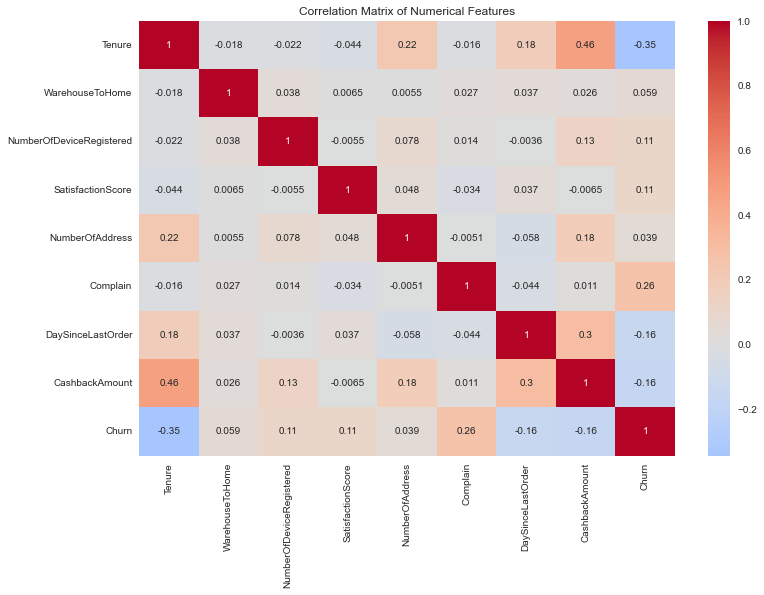

In [14]:
plt.figure(figsize=(12,8))

sns.heatmap(data=df.corr(), center=0, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix of Numerical Features')

plt.show()

### Analysis

- Data imbalance, dimana jumlah customer yang tidak `Churn` sebanyak 83% dan yang `Churn` 17% *[tabel terletak di segment Data Understanding]*
- Berdasarkan feature `Tenure`, potensi customer churn akan berkurang dengan bertambah lamanya customer stay. Potensi churn tertinggi berada di 2 bulan pertama (artinya customer baru)
- Berdasarkan feature `WarehouseToHome`, potensi customer churn akan berkurang dengan bertambah dekatnya jarak rumah ke warehouse, namun tidak signifikan.
- Berdasarkan feature `DaySinceLastOrder`, potensi customer churn akan berkurang dengan bertambah lamanya hari terakhir mereka berbelanja.
- Berdasarkan feature `CashbackAmount`, potensi customer churn akan berkurang dengan bertambah tinggi nya cashback yang diterima customer.
- Berdasarkan feature `PreferedOrderCat`, customer yang berbelanja kategori barang yang relatif lebih mahal memiliki potensi churn lebih tinggi.
- Berdasarkan feature `SatisfactionScore`, tingkat satisfaction tinggi tidak menjamin customer untuk tidak churn
- Berdasarkan feature `MaritalStatus`, customer yang single memiliki potensi churn tertinggi
- Berdasarkan feature `Complain`, customer yang melakukan complain memiliki potensi churn lebih tinggi
- Berdasarkan matrix korelasi, `Tenure` dan `CashbackAmount` memiliki korelasi tertinggi dengan nilai 0.46 (artinya semakin lama customer stay, semakin tinggi jumlah cashback yang diterima)
- Features yang tidak disebutkan berarti tidak memiliki pengaruh yang jelas terhadap potensi `Churn`

Setelah analisis/EDA berhasil dilakukan, maka kita akan mempersiapkan data untuk pembuatan model machine learning.

## Data Preparation 

In [15]:
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,4.0,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


Kita akan melakukan encoding kepada 2 feature kategorikal yang ada, yaitu `PreferedOrderCat` dan `MaritalStatus`. Sehubungan kedua kolom memiliki jumlah unique feature sedikit, maka kita dapat menggunakan **One Hot Encoding**.

In [25]:
# transformer
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['PreferedOrderCat','MaritalStatus'])
], remainder='passthrough')

# scaler
scaler = RobustScaler()

In [26]:
# define X and y
X = df.drop(columns=['Churn'])
y = df['Churn']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=2022)

## Modeling & Evaluation

In [66]:
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
adb = AdaBoostClassifier(random_state=0)
xgb = XGBClassifier(random_state=0)

### Model Benchmarking : K-Fold

In [67]:
models = [logreg, knn, dt, rf, adb, xgb]
score = []
mean = []
std = []

for i in models:
    estimator = Pipeline([
        ('preprocess',transformer),
        ('scaler',scaler),
        ('model',i)
        ])

    model_cv = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=5,
        scoring='f1')

    score.append(model_cv)
    mean.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({
    'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost'],
    'f1-score mean':mean,'f1-score std':std}).set_index('model').sort_values(by='f1-score mean',ascending=False)

[00:01:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:01:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:01:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:01:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,f1-score mean,f1-score std
model,,
XGBoost,0.798991,0.025091
Random Forest,0.774987,0.018619
Decision Tree,0.736604,0.024620
AdaBoost,0.650584,0.022635
Logistic Regression,0.558458,0.030514
KNN,0.516843,0.022790


Terlihat bahwa model **XGBoost** adalah yang terbaik untuk f1-score dari setiap model yang menggunakan **random_state=0** kepada semua model kecuali KNN.

**References :**
- https://docs.aws.amazon.com/sagemaker/latest/dg/xgboost-HowItWorks.html
- https://analyticsindiamag.com/xgboost-internal-working-to-make-decision-trees-and-deduce-predictions/

### Test Oversampling

Sebelum kita melakukan hyperparameter tuning terhadap benchmark model yang terpilih (XGBoost), maka kita akan mencoba mengaplikasikan **SMOTE** untuk mengatasi problem dataset imbalance.

<br>**References :**
- https://towardsdatascience.com/smote-fdce2f605729
- https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [68]:
smote = SMOTE(random_state=0)

model = xgb
score = []
mean = []
std = []

estimator = Pipeline([
    ('preprocess',transformer),
    ('scaler',scaler),
    ('resampler',smote),
    ('model',xgb)
    ])

model_cv = cross_val_score(
    estimator,
    X_train,
    y_train,
    cv=5,
    scoring='f1')

score.append(model_cv)
mean.append(model_cv.mean())
std.append(model_cv.std())

pd.DataFrame({
    'model':'XGBoost',
    'F1-score mean': mean,
    'F1-score std': std
})

[00:01:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:01:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:01:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:01:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,model,F1-score mean,F1-score std
0,XGBoost,0.789412,0.023991


Terlihat bahwa ketika mengimplementasikan SMOTE, performa model **justru menurun** (meskipun tidak banyak), maka kita akan melakukan hyperparameter tuning tanpa melakukan oversampling.

## Hyperparameter Tuning

**References :**
- https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [90]:
hyperparam_space = {
    'model__eta': [0.01, 0.1, 0.2, 0.3],
    'model__min_child_weight': [1, 3, 5],
    'model__max_depth': [7, 8, 9, 10],     
    'model__subsample': [0.5, 0.75, 1],
    'model__colsample_bytree': [0.5, 0.75, 1]
}

xgb = XGBClassifier(random_state=0)
xgb_pipe = Pipeline([
    ('preprocess', transformer),
    ('scaler', scaler),
    ('model', xgb)
])

# Grid Search
grid_search = GridSearchCV(
    estimator=xgb_pipe,
    param_grid=hyperparam_space,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# fitting gridsearch
grid_search.fit(X_train, y_train)

[01:21:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['PreferedOrderCat',
                                                                          'MaritalStatus'])])),
                                       ('scaler', RobustScaler()),
                                       ('model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsa

In [91]:
print('Best f1 score: ', grid_search.best_score_)
print('Best param: ', grid_search.best_params_)

Best f1 score:  0.8111754592492864
Best param:  {'model__colsample_bytree': 1, 'model__eta': 0.2, 'model__max_depth': 8, 'model__min_child_weight': 1, 'model__subsample': 0.75}


**Hyperparameter terbaik XGBoost** dari hasil Gridsearch
<br>=> `eta` = 0.2, `min_child_weight` = 1, `max_depth` = 8, `subsample` = 0.75, `colsample_bytree` = 1

Model setelah dituning memiliki f1-score 0.8111 dan **mengalami sedikit kenaikan** dari benchmark model dengan f1-score 0.7989. Kemudian kita akan mencoba mengaplikasikan kedua model terhadap test set.

In [92]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

[01:21:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('scaler', RobustScaler()),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               eta=0.2, gamma=0, gpu_i...
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.200000003, max_delta_step=0,
                               max_depth=8, min_child_weight=1, missing=nan,
                               monotone_constraint

In [93]:
xgb = XGBClassifier(random_state=0)
estimator = Pipeline([
    ('preprocess', transformer),
    ('scaler', scaler),
    ('model', xgb)
])
estimator.fit(X_train, y_train)

[01:21:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('scaler', RobustScaler()),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()',

In [94]:
y_pred_default = estimator.predict(X_test)
y_pred_tuned = best_model.predict(X_test)

f1_score_default = f1_score(y_test, y_pred_default)
f1_score_tuned = f1_score(y_test, y_pred_tuned)

print('F1-Score Default XGB : ', f1_score_default)
print('F1-Score Tuned XGB : ', f1_score_tuned)

F1-Score Default XGB :  0.8671875
F1-Score Tuned XGB :  0.8379446640316205


Terlihat bahwa model XGBoost sebelum kita tuning hyperparameternya memiliki nilai F1-Score yang lebih tinggi pada test set, meskipun nilai nya lebih rendah pada training set.

Kita juga dapat liat perbandingan classification reportnya.

In [96]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default XGB : \n', report_default)
print('Classification Report Tuned XGB : \n', report_tuned)

Classification Report Default XGB : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       654
           1       0.92      0.82      0.87       135

    accuracy                           0.96       789
   macro avg       0.94      0.90      0.92       789
weighted avg       0.96      0.96      0.96       789

Classification Report Tuned XGB : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       654
           1       0.90      0.79      0.84       135

    accuracy                           0.95       789
   macro avg       0.93      0.88      0.90       789
weighted avg       0.95      0.95      0.95       789



Kembali lagi terlihat bahwa model XGBoost sebelum kita tuning hyperparameternya memiliki classification report yang lebih baik walaupun hanya lebih baik sedikit saja. Oleh karena itu kita akan menggunakan model XGBoost yang belum di tuned sebagai model akhir kita.

### Feature Importances

Mari sekarang kita lihat fitur/kolom apa saja yang paling penting untuk model XGBoost kita

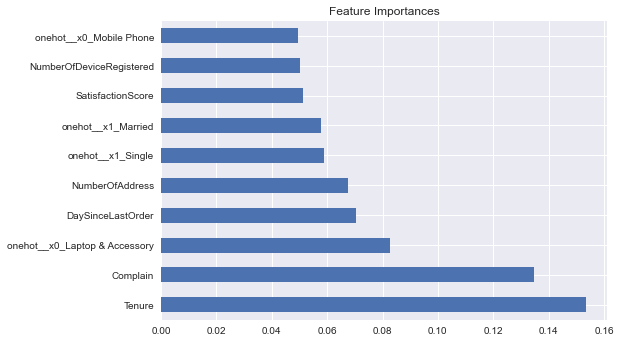

In [97]:
coef1 = pd.Series(best_model['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False).head(10)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

Terlihat bahwa ternyata untuk model XGBoost kita, fitur/kolom `Tenure` adalah yang paling penting, kemudian diikuti dengan `Complain`, `PreferedOrderCat: Laptop & Accessory`, dan selanjutnya.

## Conclusion & Recommendation

In [98]:
print('Classification Report Default XGBoost : \n', report_default)

Classification Report Default XGBoost : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       654
           1       0.92      0.82      0.87       135

    accuracy                           0.96       789
   macro avg       0.94      0.90      0.92       789
weighted avg       0.96      0.96      0.96       789



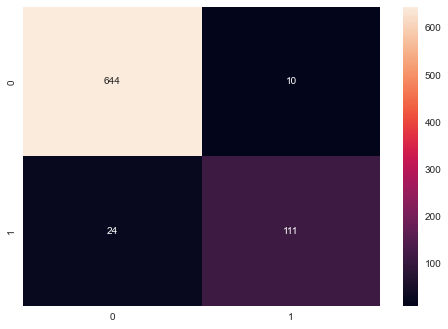

In [99]:
xgb_mat = confusion_matrix(y_test, y_pred_default)
sns.heatmap(xgb_mat, annot=True, fmt="g")
plt.show()

### Conclusion

Hal-hal yang dapat dikonklusikan berdasarkan hasil classification report:
- Berdasarkan `Recall`, terdapat 98% customer yang dibatasi promonya dan memang tidak akan churn, dan terdapat 82% customer yang diberika promo dan memang akan churn.
- Berdasarkan `Precision`, kita dapat memprediksi 96% customer yang tidak churn dengan tepat, dan memprediksi 92% customer yang churn dengan tepat.

#### Recommendation

Hal-hal yang bisa dilakukan untuk mempertahankan customer:
- Tenure seorang customer cukup berhubungan dengan cashback amount yang diterima customer, sehingga untuk customer yang lebih baru (khususnya 2 bulan pertama karena memiliki potensi churn tertinggi), dapat diberikan promo berupa cashback yang cukup besar. Tentunya promo bisa disesuaikan kedepannya sehingga tidak mengeluarkan cost yang berlebih.
- Bagi customer yang memiliki jarak cukup jauh dari warehouse dapat lebih sering diberikan promo berupa potongan ongkos kirim sehingga mengurangi kemungkinan customer untuk churn.
- Complain merupakan salah satu feature yang cukup berpengaruh terhadap churn, untuk itu sistem dan pelayanan customer service perlu diperhatikan dan dikembangkan.
- Customer yang lebih sering berbelanja barang di kategori yang relatif lebih mahal dapat diberikan promo yang lebih baik juga sehingga mengurangi potensi customer untuk churn.
- Tingkat satisfaction customer tidak menjamin customer untuk tidak churn, sehingga tetap perlu memperhatikan pola belanja dari customer tersebut.

Hal-hal yang bisa dilakukan untuk mengembangkan project dan modelnya lebih baik lagi :
- Menghandle missing values dengan pengecekan lebih detil sehingga dapat diisi dengan lebih tepat.
- Mengeksplorasi lebih banyak hubungan antar feature numerikalnya, bukan hanya satu feature terhadap feature churn.
- Menambah beberapa data/feature lainnya, seperti metode pembayaran yang lebih sering dipakai, lama nya customer membuka aplikasi, atau kuantitas dalam sekali transaksi, sehingga performa model dapat lebih ditingkatkan, dan lainnya.
- Mencoba algoritma ML dan model lainnya, ataupun handling imbalance dengan metode lain, dan kemudian di hyperparameter tuning dengan lebih baik.